In [ ]:
import tensorflow as tf
matrix1 = tf.constant([[3.,3.]])
matrix2 = tf.constant([[2.],[2.]])
product = tf.matmul(matrix1,matrix2)
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

## 使用 TensorFlow, 你必须明白 TensorFlow: 

1. 使用图__graph__ 来表示计算任务.
2. 在被称之为 *会话 (Session) 的上下文* (context) 中执行图.
3. 使用 \*tensor\_ 表示数据.
4. 通过 变量 (Variable) 维护状态.
5. 使用 feed 和 fetch 可以为任意的操作(arbitrary operation) 赋值或者从其中获取数据.

Tensorflow是一个编程系统，用图来表示计算任务，图中的节点称之为op，一个op活的0个或多个tensor执行计算后，产生0个或多个Tensor，每个Tensor是一个类型化的多维数组。如：可以将一小组图像集表示为一个四维浮点数组，四个维度为：［batch，height，width，channels］
图必须在会话里被启动，会话将图的op发送到CPU或GPU上，提供op的执行方法，之后将产生的tensor实例（对象）返回。

In [ ]:
import tensorflow as tf
with tf.Session() as sess2:
    with tf.device('/gpu:1'):
        matrix1 = tf.constant([[3.,3.]])
        matrix2 = tf.constant([[2.],[2.]])
        product = tf.matmul(matrix1,matrix2)
        result = sess2.run(product)
        print(result)

In [ ]:
import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.Variable([1.0,2.0])
a = tf.constant([3.0,3.0])

x.initializer.run()

sub = tf.sub(x,a)

print(sub.eval());

In [2]:
#创建一个变量，初始化为标量0
import tensorflow as tf
state = tf.Variable(0, name='counter')

#创建一个op，作用是使state +1
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

#启动graph后，变量必须先经过初始化 op
#首先必须增加一个初始化op到图中
init_op = tf.initialize_all_variables()

#启动graph，运行op
with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(state))
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

0
1
2
3


# Fetch
>为了取回操作的输出内容，可会在使用**session**对象的_run()_调用执行图时，传入一些tensor，``这些tensor会帮助你取回结果``，在之前的例子里，我们只取回了单个借点*state*,但是你也可以取回多个tensor
<https://markdown.com>


In [6]:
import tensorflow as tf
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2,input3)
mul = tf.mul(input1,intermed)

with tf.Session() as sess:
    result = sess.run([mul, intermed])
    print(result)
    result

[21.0, 7.0]


# Feed
>在计算图中引入tensor，以变量或常量的形势存储，TensorFlow还提供feed机制，可以临时替代途中任意操作中的tensor可以对途中任何操作提交补丁，直接插入一个tensor。
>feed使用一个tenso值临时替换一个操作的输出结果，可以提供feed数据作为**run()**调用的参数，feed只在调用他的方法内有效，方法结束feed消失，最常见的用例是将某些特殊的操作指定为“feed”操作，标记的方法是使用tf.placeholder()为这些操作创建占位符。

In [7]:
import tensorflow as tf
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.mul(input1,input2)

with tf.Session() as sess:
    print(sess.run([output], feed_dict={input1:[7.], input2:[2.]}))
    

[array([ 14.], dtype=float32)]


Populating the interactive namespace from numpy and matplotlib


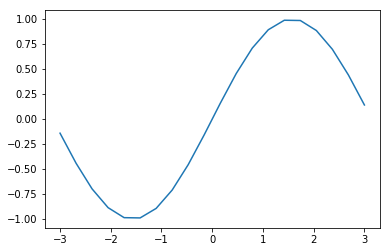

In [1]:
%pylab inline
from numpy import linspace,sin
import matplotlib
from pylab import plot
x = linspace(-3,3,20)
plot(x,sin(x))